In [20]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

In [21]:
Unsupervised_Data=pd.read_csv("Unsupervised_Data_v2.csv",encoding="utf-8")

In [22]:
print(Unsupervised_Data.shape)

(926, 8)


In [23]:
print(Unsupervised_Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 8 columns):
Sno                926 non-null int64
Date               926 non-null int64
distance in mts    926 non-null float64
STime (s)          926 non-null float64
TTime (s)          926 non-null float64
Dtransit (mts)     926 non-null float64
Place_cat          926 non-null int64
Time_cat           926 non-null int64
dtypes: float64(4), int64(4)
memory usage: 58.0 KB
None


In [24]:
Unsupervised_Data.describe()

,Sno,Date,distance in mts,STime (s),TTime (s),Dtransit (mts),Place_cat,Time_cat
count,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000
mean,525.537797,16.547516,32.290539,4369.457883,1172.417927,3279.468762,44.606911,4.165227
std,305.969919,8.181681,435.116431,19936.422161,4002.710765,4948.270928,44.755587,2.422802
min,0.000000,2.000000,0.000000,5.999999,1.999999,0.000000,1.000000,0.000000
25%,261.250000,11.000000,0.221260,169.000000,89.250001,88.183956,4.000000,2.000000
50%,521.500000,16.500000,1.914000,356.500000,380.500000,1052.996926,18.000000,4.000000
75%,784.750000,23.000000,5.693486,979.500000,1024.500000,4809.405051,100.000000,6.000000
max,1067.000000,31.000000,10192.964460,432890.000000,43336.000000,36990.773080,100.000000,9.000000


In [25]:
Unsupervised_Data_norm = Unsupervised_Data[['Date', 'distance in mts', 'STime (s)','TTime (s)','Dtransit (mts)','Time_cat','Place_cat']]
Unsupervised_Data_norm.head()

,Date,distance in mts,STime (s),TTime (s),Dtransit (mts),Time_cat,Place_cat
0,2,0.000000,313.000000,993.000000,8012.243141,9,100
1,2,0.929294,132.999999,40.000000,56.818467,9,100
2,2,4.314577,7069.999999,38.000001,14.582652,9,100
3,2,1.406179,8.999999,159.000001,107.390549,1,100
4,2,0.868151,206.000000,1832.000001,7137.114475,2,99


In [26]:
from sklearn.preprocessing import normalize
data_scaled = normalize(Unsupervised_Data_norm)

In [27]:
data_scaled = pd.DataFrame(data_scaled, index = Unsupervised_Data.Sno, columns=Unsupervised_Data_norm.columns)
data_scaled.head()

,Date,distance in mts,STime (s),TTime (s),Dtransit (mts),Time_cat,Place_cat
Sno,,,,,,,
0,0.000248,0.000000,0.038737,0.122893,0.991586,0.001114,0.012376
1,0.011076,0.005147,0.736583,0.221529,0.314673,0.049844,0.553822
2,0.000283,0.000610,0.999882,0.005374,0.002062,0.001273,0.014143
3,0.009235,0.006493,0.041557,0.734180,0.495874,0.004617,0.461749
4,0.000271,0.000118,0.027943,0.248507,0.968134,0.000271,0.013429


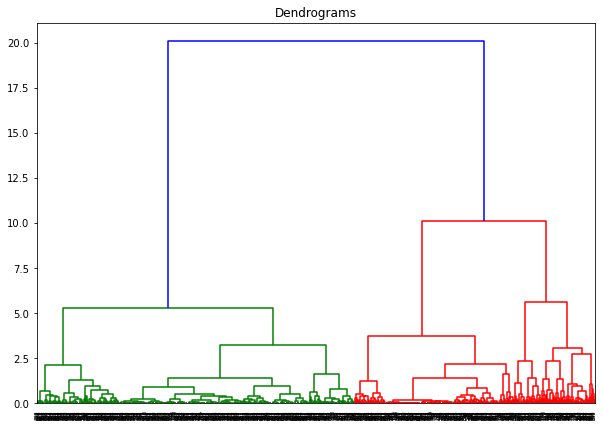

In [28]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [29]:
from sklearn.cluster import AgglomerativeClustering
ac2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward') 

In [30]:
ac3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward') 

In [31]:
ac4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward') 

In [32]:
ac5 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward') 

In [33]:
ac6 = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward') 

In [34]:
k = [2, 3, 4, 5, 6]

In [35]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(data_scaled, ac2.fit_predict(data_scaled)))
silhouette_scores.append(
        silhouette_score(data_scaled, ac3.fit_predict(data_scaled)))
silhouette_scores.append(
        silhouette_score(data_scaled, ac4.fit_predict(data_scaled)))
silhouette_scores.append(
        silhouette_score(data_scaled, ac5.fit_predict(data_scaled)))
silhouette_scores.append(
        silhouette_score(data_scaled, ac6.fit_predict(data_scaled)))

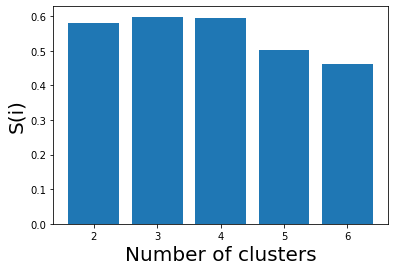

In [36]:
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

In [37]:
from sklearn.cluster import AgglomerativeClustering
cluster3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster3.fit_predict(data_scaled)

array([1, 0, 2, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 2, 0, 1, 1,
       2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2,
       2, 1, 2, 0, 1, 0, 1, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1,
       1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 1, 0, 2,
       0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 2, 2, 2, 0, 1, 2, 2, 0, 1, 1, 1, 2,
       1, 0, 1, 1, 1, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 2, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 0,
       0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1,
       0, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 0, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0,
       1, 2, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,

In [38]:
# Assign the clusters to datamart
Unsupervised_Data['Cluster3'] = cluster3.labels_
Unsupervised_Data.head()

,Sno,Date,distance in mts,STime (s),TTime (s),Dtransit (mts),Place_cat,Time_cat,Cluster3
0,0,2,0.000000,313.000000,993.000000,8012.243141,100,9,1
1,1,2,0.929294,132.999999,40.000000,56.818467,100,9,0
2,2,2,4.314577,7069.999999,38.000001,14.582652,100,9,2
3,3,2,1.406179,8.999999,159.000001,107.390549,100,1,0
4,4,2,0.868151,206.000000,1832.000001,7137.114475,99,2,1


In [39]:
from sklearn.cluster import AgglomerativeClustering
cluster4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster4.fit_predict(data_scaled)

array([0, 1, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 3, 0, 0,
       2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 3, 2, 2, 2, 2, 2, 3, 2, 0, 2,
       2, 0, 2, 1, 0, 3, 0, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0,
       2, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 1, 0, 0, 1, 1, 3, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0,
       0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 3, 0, 1, 2,
       1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0, 0, 2,
       0, 3, 0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 1,
       1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0,
       1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 3, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1,
       0, 2, 0, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0,

In [40]:
# Assign the clusters to datamart
Unsupervised_Data['Cluster4'] = cluster4.labels_
Unsupervised_Data.head()

,Sno,Date,distance in mts,STime (s),TTime (s),Dtransit (mts),Place_cat,Time_cat,Cluster3,Cluster4
0,0,2,0.000000,313.000000,993.000000,8012.243141,100,9,1,0
1,1,2,0.929294,132.999999,40.000000,56.818467,100,9,0,1
2,2,2,4.314577,7069.999999,38.000001,14.582652,100,9,2,2
3,3,2,1.406179,8.999999,159.000001,107.390549,100,1,0,1
4,4,2,0.868151,206.000000,1832.000001,7137.114475,99,2,1,0


In [41]:
Unsupervised_Data.to_csv('Hierarchical_Clustering_v2.csv')

In [43]:
# calculate averae values for each Cluster
Unsupervised_Data_agg = Unsupervised_Data.groupby('Cluster3').agg({
    'distance in mts' : 'mean',
    'STime (s)' : 'mean',
    'TTime (s)' : 'mean',
    'Dtransit (mts)' : ['mean', 'count']
})
Unsupervised_Data_agg.round(2).head(10)

distance in mts STime (s) TTime (s) Dtransit (mts)      
                    mean      mean      mean           mean count
Cluster3                                                         
0                 161.73   1177.90   2714.13        1071.94   134
1                   5.90    659.63   1156.11        5088.26   527
2                  19.32  13360.96    425.26         798.63   265